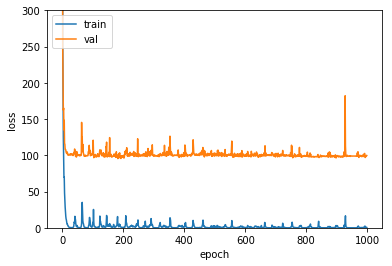

100/100 [==============================] - 0s 100us/step
107.19684143066407


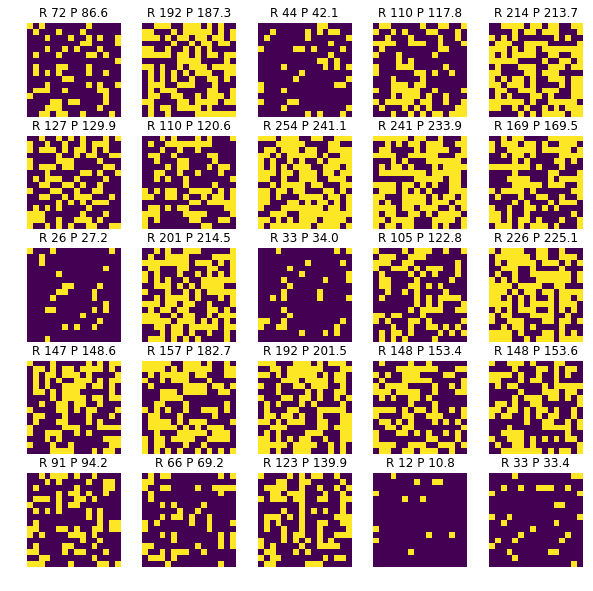

In [2]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

width = 16
height = 16

def generate_dataset(samples):

    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
    
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)
    
def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    
    return img.reshape(width, height, 1)

# 1. 데이터셋 생성하기
x_train, y_train = generate_dataset(1500)
x_val, y_val = generate_dataset(300)
x_test, y_test = generate_dataset(100)

x_train_1d = x_train.reshape(x_train.shape[0], width*height)
x_val_1d = x_val.reshape(x_val.shape[0], width*height)
x_test_1d = x_test.reshape(x_test.shape[0], width*height)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, activation='relu', input_dim = width*height))
model.add(Dense(256, activation='relu'))
model.add(Dense(256))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mse', optimizer='adam')

# 4. 모델 학습시키기
hist = model.fit(x_train_1d, y_train, batch_size=32, epochs=1000, validation_data=(x_val_1d, y_val),verbose=0)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test_1d, y_test, batch_size=32)

print(score)

# 7. 모델 사용하기
yhat_test = model.predict(x_test_1d, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()